
# WhatsApp Chat Analysis

## Introduction

In today's digital age, messaging platforms like WhatsApp have revolutionized the way we communicate. WhatsApp groups, in particular, serve as hubs for conversations among friends, family, and colleagues, creating a treasure trove of textual data. This project is dedicated to the exploration and analysis of WhatsApp chat data.

Chat data analysis encompasses various aspects, including understanding the dynamics of group interactions, identifying popular topics, and gaining insights into communication patterns. Our project dives into this realm by focusing on WhatsApp chat conversations, with the aim of uncovering valuable insights, such as:

-   Understanding the trends and topics that dominate WhatsApp group conversations.
-   Identifying patterns and key events within the chat data.
-   Visualizing chat activity over time.
-   Analyzing the frequency of messages, media sharing, and more.

To achieve these objectives, we will leverage Python, along with data manipulation libraries and techniques. Additionally, we will use data visualization tools to present our findings clearly and effectively.

### Project Goals

1.  **Data Collection**: Extract and preprocess WhatsApp chat data, ensuring it's ready for analysis.
    
2.  **Chat Analysis**: Perform comprehensive analysis, including message frequency, user interactions, and content trends.
    
3.  **Visualization**: Create informative visualizations to represent chat activity, trends, and patterns effectively.
    
4.  **Insight Generation**: Draw meaningful insights from the chat data analysis results and provide actionable recommendations or conclusions based on these insights.
    
5.  **Pythonic Code**: Throughout the project, we will follow Python best practices and coding guidelines (PEP-8) to ensure clean, optimized, and maintainable code.


**Before starting with the task of WhatsApp Chat analysis with Python**, you need to extract your WhatsApp data from your smartphone, which is a straightforward process. Follow these steps to export your WhatsApp chats:

1.  If you are using an iPhone:
    
    -   Open the chat with the person or group you want to export.
    -   Tap on the Contact Name or the Group Name at the top of the chat.
    -   Scroll to the bottom and tap on "Export Chat."
2.  If you are using an Android smartphone:
    
    -   Open the chat with the person or group you want to export.
    -   Tap on the three dots (menu) located at the top right corner of the chat.
    -   Select "More" or "Options."
    -   Tap on "Export Chat."
3.  Regardless of your smartphone type, you'll be prompted to choose whether you want to export the chat with or without media (images, videos, etc.). For simplicity in your analysis, you can choose "without media."
    
4.  After making your selection, you'll have the option to email this chat to yourself. Enter your email address and send the chat.
    
5.  Access your email from your computer, open the email containing the exported chat, and download it to your system.
    

Now that you have successfully exported your WhatsApp chat, you can proceed with WhatsApp chat analysis using Python. In the following sections, we will guide you through the steps of analyzing WhatsApp chat data with Python.

Let's Start

#### Import all necessary libraries

In [1]:
# Data manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Data visualization (based on matplotlib)
import seaborn as sns

# For regular expressions
import regex

# Word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# For text preprocessing
import re

# For mathematical operations
import numpy as np

# For counting most common words in a list of strings
from collections import Counter

# For creating a network graph
import networkx as nx

# Show every column in dataframe
pd.set_option("display.max_columns", None)

# For creating a network graph

# pip install emoji

In [2]:
# Define the file path to your WhatsApp chat Excel file
chat_excel_file_path = "../Sentiment_Analysis/dataset/1_Dec_Chat.xlsx"

# Read the WhatsApp chat data from the Excel file into a DataFrame
# index_col=0 means that the first column is the index column
chat_data = pd.read_excel(chat_excel_file_path, index_col=0)

# Display the first 5 rows of the chat data
first_five_rows = chat_data.head(5)

# Print the first five rows to view the data
first_five_rows

,time,sender name,sender message,Column3,Column4
date,,,,,
2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,NaN,NaN,NaN
2022-09-29,7:08:00 PM,You joined using this group's invite link,NaN,NaN,NaN
2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?,NaN,NaN
2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,NaN,NaN,NaN
2022-09-29,7:09:00 PM,Chiraggg,Kiski?,NaN,NaN


In [3]:
# Let's copy our data into a new DataFrame so we don't modify the original data
df = chat_data.copy()


As we have successfully imported the data into a data frame, we can now proceed with the next step of the analysis. We will start by cleaning the data and preparing it for analysis.

Let's first merge the 3 message columns into a single column. 

As we have 2 columns, while  merging them, we are getting NaN values in the merged column. So, we will replace the NaN values with empty strings.

In [4]:
# Replace NaN values with empty strings in columns 'sender message', 'Column3', and 'Column4'
df["sender message"].fillna("", inplace=True)
df["Column3"].fillna("", inplace=True)
df["Column4"].fillna("", inplace=True)

# Merge sender message, Column3, and Column4 columns into a single column named Message
df["Message"] = (
    df["sender message"]
    + " "
    + df["Column3"].astype(str)
    + " "
    + df["Column4"].astype(str)
)

# Drop the sender message, Column3, and Column4 columns
df.drop(columns=["sender message", "Column3", "Column4"], inplace=True)


In [5]:
# Display the first 5 rows of the chat data
df.head(5)

,time,sender name,Message
date,,,
2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
2022-09-29,7:08:00 PM,You joined using this group's invite link,
2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
2022-09-29,7:09:00 PM,Chiraggg,Kiski?


#### Data Cleaning

As we have successfully merged the 3 message columns into a single column, we can now proceed with the next step of the analysis. We will start by cleaning the data and preparing it for analysis.


In [6]:
# Reset the index of the DataFrame
df.reset_index(inplace=True)

# Rename the index column to "date"
df.rename(columns={"date": "date"}, inplace=True)

# Display the first five rows of the DataFrame
df

,date,time,sender name,Message
0,2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
1,2022-09-29,7:08:00 PM,You joined using this group's invite link,
2,2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
3,2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
4,2022-09-29,7:09:00 PM,Chiraggg,Kiski?
...,...,...,...,...
2237,2023-03-30,2:02:00 AM,Disappearing messages now support keeping mes...,
2238,2023-04-28,12:11:00 AM,~ Satya left,
2239,2023-06-03,10:57:00 PM,~ Prity Singh left,
2240,2023-08-05,6:55:00 PM,+91 96182 81233 changed their phone number to...,


In [7]:
# Let's remove the rows that contains NaT values in the Date column, NaN values in the sender name column, and empty strings in the Message column
df.dropna(subset=["date", "sender name", "Message"], inplace=True)
df.head(220)


,date,time,sender name,Message
0,2022-09-29,7:04:00 PM,Manish Accenture created group Accenture 22 J...,
1,2022-09-29,7:08:00 PM,You joined using this group's invite link,
2,2022-09-29,7:08:00 PM,Manish Accenture,Aapki 19sept ki joining the ?
3,2022-09-29,7:08:00 PM,Harshit Accenture joined using this group's i...,
4,2022-09-29,7:09:00 PM,Chiraggg,Kiski?
...,...,...,...,...
215,2022-10-14,9:11:00 PM,Harshit Accenture,Baaki sab ko bhi aaya h?
216,2022-10-14,9:12:00 PM,+91 95049 43695,Ha
217,2022-10-15,9:20:00 AM,Manish Accenture,👋.....
219,2022-10-15,7:27:00 PM,Dilip Accenture joined using this group's inv...,


#### EDA

##### Total Messages Sent by Each User

In [8]:
# Let's see total messages sent
total_messages = df.shape[0]
print("Total messages sent:", total_messages)

Total messages sent: 2134


##### Total Media Messages Sent by Each User

In [9]:
# Count the number of media messages by checking if 'Message' contains '<Media omitted>'
num_media_messages = df[df["Message"].str.contains("<Media omitted>")].shape[0]
num_media_messages

88

##### Total User's joined and left the group

In [10]:
# Count the number of times someone joined the group using the invite link
join_message_count = df[
    df["sender name"].str.contains(" joined using this group's invite link")
].shape[0]

# Count the number of times someone left the group
leave_message_count = df[df["sender name"].str.contains(" left")].shape[0]

# Print the counts
print("Total join messages:", join_message_count)
print("Total leave messages:", leave_message_count)


Total join messages: 73
Total leave messages: 18


#### Extract emojis from messages

In [11]:
# Function to extract emojis from a text message
def extract_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF"
        r"\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF"
        r"\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF"
        r"\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF"
        r"\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+",
        flags=re.UNICODE,
    )
    emojis = emoji_pattern.findall(text)
    return emojis


# Apply the extract_emojis function to the 'Message' column and create a new column 'Emojis'
df["Emojis"] = df["Message"].apply(extract_emojis)

# Count the total number of emojis
total_emojis = sum(df["Emojis"].str.len())

# Print the total number of emojis
print(total_emojis)

172


#### Top 10 frequent emojis used in the chat

In [12]:
# Function to extract emojis from a text message
def extract_emojis(text):
    # Define a regular expression pattern to match emojis
    emoji_pattern = re.compile(
        r"[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF"
        r"\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF"
        r"\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF"
        r"\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF"
        r"\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+",
        flags=re.UNICODE,
    )
    emojis = emoji_pattern.findall(text)
    return emojis


# Apply the extract_emojis function to the 'Message' column and create a new column 'Emojis'
df["Emojis"] = df["Message"].apply(extract_emojis)

# Count the total number of emojis
emojis = sum(df["Emojis"].str.len())

# Count the frequency of each emoji
emoji_counts = Counter([emoji for sublist in df["Emojis"] for emoji in sublist])

# Get the top 10 emojis
top_10_emojis = emoji_counts.most_common(10)

# Create a DataFrame to display the top 10 emojis and their frequencies
top_10_df = pd.DataFrame(top_10_emojis, columns=["Emoji", "Frequency"])

# Set the index to start from 1
top_10_df.index = range(1, len(top_10_df) + 1)

# Display the DataFrame
top_10_df

,Emoji,Frequency
1,😂,30
2,🤣,14
3,😂😂,14
4,🙂🙂,9
5,😶,7
6,🙂,7
7,🥲,5
8,🏻,4
9,😂😂😂,4
10,😅,3


In [13]:
URLPATTERN = r"(https://\S+)"
df["urlcount"] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

links

0

In the dataset, it's worth noting that certain messages containing links appear to have been consolidated into a single entity labeled as `<Media omitted>` by WhatsApp. 

#### Let's display a word cloud of most common words

There are 55534 words in all the messages.


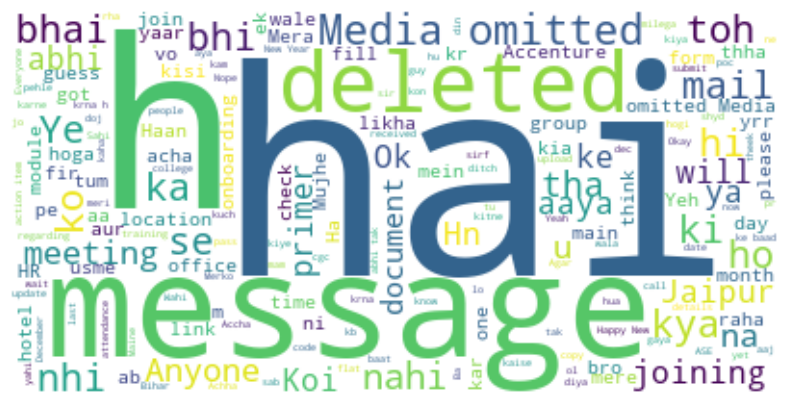

In [14]:
# Join all messages into a single text
text = " ".join(message for message in df["Message"])

# Calculate the total number of words in all the messages
total_words = len(text)
print("There are {} words in all the messages.".format(total_words))

# Define stopwords
stopwords = set(STOPWORDS)

# Generate a WordCloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
# Count the number of deleted messages using a regex pattern
deleted_messages_count = df[
    df["Message"].str.contains(
        r"^\s*This message was deleted\s*$", case=False, regex=True
    )
].shape[0]

# Print the count of deleted messages
print("Total deleted messages:", deleted_messages_count)


Total deleted messages: 88


#### Top 10 active users in the group

In [36]:
# Find the top 10 most active users in the group chat
top_10_active_users = df["sender name"].value_counts().head(10)

# Convert the Series to a DataFrame and reset the index
top_10_active_users_df = top_10_active_users.reset_index()

# Rename the columns to be more descriptive
top_10_active_users_df.columns = ["Sender", "Message Count"]

# Print the top 10 most active users
top_10_active_users_df


,Sender,Message Count
0,+91 70189 03525,255
1,+91 74046 32502,233
2,Manish Accenture,207
3,+91 90066 20243,182
4,Harshit Accenture,147
5,+91 70276 35456,104
6,Chiraggg,102
7,+91 94628 94302,86
8,+91 95049 43695,67
9,+91 85588 53500,60


I'd like to clarify that the users whose phone numbers are displayed instead of their names in the output are likely because I haven't saved their numbers as contacts. In group chats, WhatsApp may display phone numbers for users who haven't set a custom display name or if their number isn't recognized as a contact. This is why you see these phone numbers in the list.

#### Keyword Search

##### Analyzing the Most Common Keywords in Chat Messages

In [51]:
# Step 1: Combine all the chat messages into a single text
chat_text = " ".join(df["Message"])

# Step 2: Tokenize the text into words
chat_words = chat_text.split()

# Step 3: Convert all words to lowercase to ensure case-insensitive matching
chat_words = [word.lower() for word in chat_words]

# Step 4: Count the frequency of each word using Counter
word_counts = Counter(chat_words)

# Step 5: Sort the words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)


# Create a list to store the top keywords and their frequencies
top_keywords_list = []

# Change 10 to the desired number of top keywords
top_keywords_count = 10

# Add the top keywords and their frequencies to the list
for word, count in sorted_words[:top_keywords_count]:
    top_keywords_list.append({"Keyword": word, "Frequency": count})

# Create a DataFrame from the list
top_keywords_df = pd.DataFrame(top_keywords_list)

# Print the DataFrame
top_keywords_df


,Keyword,Frequency
0,hai,193
1,this,117
2,h,116
3,to,114
4,was,98
5,message,96
6,deleted,93
7,<media,88
8,omitted>,88
9,i,78


##### Keyword Search for Common Words in Chat Messages

This code is user-defined. You can change the keyword to any word you want to search for in the chat messages. The code will then display the number of messages containing that keyword.

In [42]:
# Let's conduct a keyword search to find the most common words used in the chat

# Step 1: Combine all the chat messages into a single text
chat_text = " ".join(df["Message"])

# Step 2: Tokenize the text into words
chat_words = chat_text.split()

# Step 3: Convert all words to lowercase to ensure case-insensitive matching
chat_words = [word.lower() for word in chat_words]

# Step 4: Define the keywords you want to search for
# Replace with your desired keywords
search_keywords = ["accenture", "joining", "date"]

# Step 5: Initialize a dictionary to count the frequency of each keyword
keyword_counts = {keyword: 0 for keyword in search_keywords}

# Step 6: Count the frequency of each keyword in the text
for word in chat_words:
    if word in keyword_counts:
        keyword_counts[word] += 1

# Step 7: Sort the keywords by frequency in descending order
sorted_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)

# Step 8: Print the most common keywords and their frequencies
for keyword, count in sorted_keywords:
    print(f"{keyword}: {count}")

joining: 36
accenture: 19
date: 10


#### Chats over Time

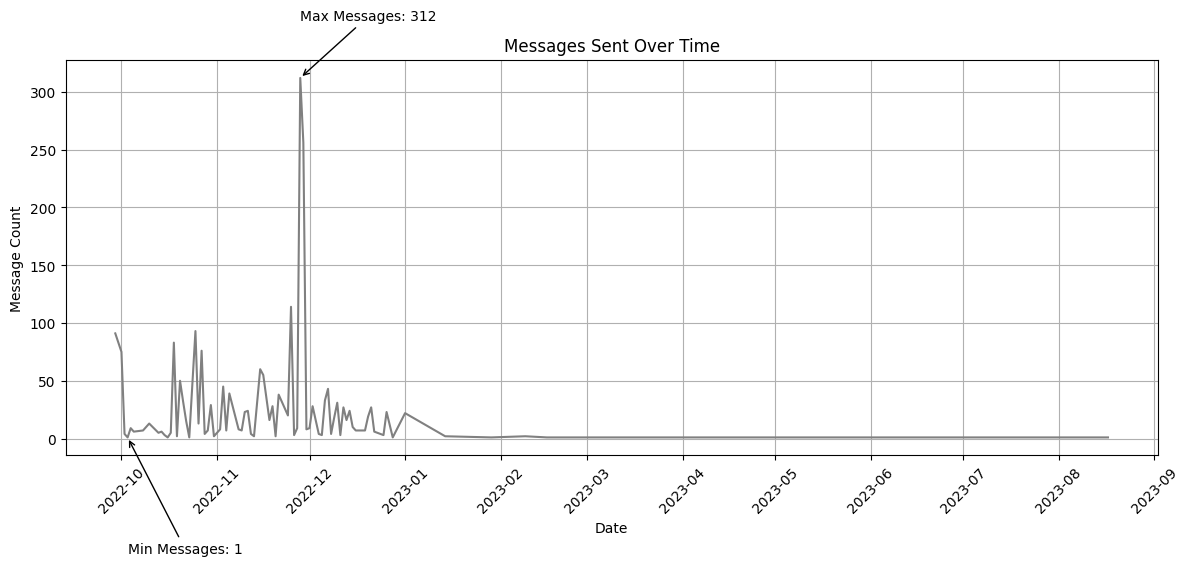

Day with Maximum Messages: 2022-11-28 (312 messages)
Day with Minimum Messages: 2022-10-03 (1 messages)


In [58]:
# Convert the 'date' column to datetime
df["date"] = pd.to_datetime(df["date"])

# Group the data by 'date' and count the number of messages for each day
message_counts = df.groupby(df["date"].dt.date)["Message"].count()

# Plot the message counts over time
plt.figure(figsize=(12, 6))
plt.plot(
    message_counts.index, message_counts.values, linestyle="-", color="grey"
)  # marker='o'
plt.title("Messages Sent Over Time")
plt.xlabel("Date")
plt.ylabel("Message Count")
plt.grid(True)

# Find the day with the maximum and minimum message counts
max_messages_day = message_counts.idxmax()
min_messages_day = message_counts.idxmin()

# Add annotations for max and min message counts
plt.annotate(
    f"Max Messages: {message_counts[max_messages_day]}",
    xy=(max_messages_day, message_counts[max_messages_day]),
    xytext=(max_messages_day, message_counts[max_messages_day] + 50),
    arrowprops=dict(arrowstyle="->"),
)
plt.annotate(
    f"Min Messages: {message_counts[min_messages_day]}",
    xy=(min_messages_day, message_counts[min_messages_day]),
    xytext=(min_messages_day, message_counts[min_messages_day] - 100),
    arrowprops=dict(arrowstyle="->"),
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the results
print(
    f"Day with Maximum Messages: {max_messages_day} ({message_counts[max_messages_day]} messages)"
)
print(
    f"Day with Minimum Messages: {min_messages_day} ({message_counts[min_messages_day]} messages)"
)

#### User Interaction Graph

A User Interaction Network, when applied to chat or social media data, can be likened to a visual map that illustrates how users engage with one another through mentions or responses within a conversation. Think of it as a way to visually depict the dynamics of communication and the relationships formed among users in a group chat or on a social platform.

As we have too many users and the graph is not clear, we will filter the users who have sent more than 100 messages.

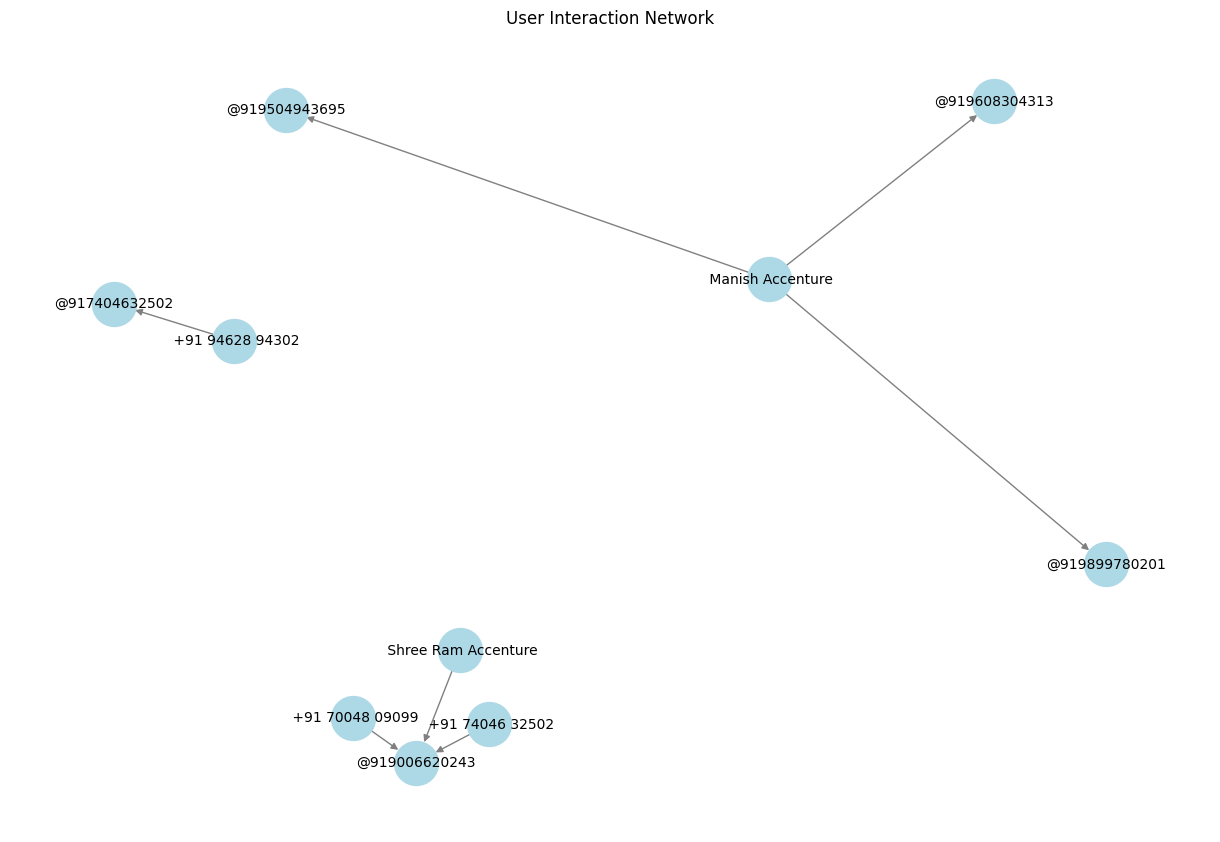

In [77]:
# Create an empty directed graph
user_interaction_graph = nx.DiGraph()

# Assuming you have a DataFrame 'chat_df' with 'sender name' and 'Message' columns
# Replace 'chat_df' with your DataFrame

# Filter the DataFrame to include interactions (e.g., mentions or replies)
interactions_df = df[df["Message"].str.contains("@", na=False)]

# Iterate through interactions and add edges to the graph
for _, row in interactions_df.iterrows():
    sender = row["sender name"]
    message = row["Message"]
    mentioned_users = [word for word in message.split() if word.startswith("@")]

    for mentioned_user in mentioned_users:
        if mentioned_user != sender:
            user_interaction_graph.add_edge(sender, mentioned_user)

# Plot the User Interaction Network
plt.figure(figsize=(12, 8))
layout = nx.spring_layout(user_interaction_graph, seed=96)
nx.draw(
    user_interaction_graph,
    layout,
    with_labels=True,
    node_size=1000,
    font_size=10,
    node_color="lightblue",
    edge_color="gray",
    arrowsize=10,
)
plt.title("User Interaction Network")
plt.show()

The visualization indicates `Manish's` central role as a key communicator in the chat, evident from multiple arrows originating from him, representing outgoing interactions with various individuals. Manish actively initiates conversations and engages through mentions or replies, shaping the chat's communication dynamics. This insight highlights his pivotal role within the group, influencing discussions and fostering engagement. <br />
The variations in line lengths within the User Interaction Network offer intriguing insights. Longer lines often indicate more frequent or substantial interactions, suggesting a deeper level of engagement between users. Conversely, shorter lines imply less frequent or less substantial exchanges, potentially reflecting casual or infrequent communication